In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np

'''
STEP 1: LOADING DATASET
'''

# train_dataset = dsets.MNIST(root='/home/deeznuts/Documents/Univ/M2_S2/Deep Learning/Proj/Data', 
#                             train=True, 
#                             transform=transforms.ToTensor(),
#                             download=False)

# test_dataset = dsets.MNIST(root='/home/deeznuts/Documents/Univ/M2_S2/Deep Learning/Proj/Data', 
#                            train=False, 
#                           transform=transforms.ToTensor())

dataset = dsets.MNIST(root='./Data', train=True, download=True, transform=transforms.ToTensor())

test = dsets.MNIST(root='./Data', train=False, download=True, transform=transforms.ToTensor())
'''
STEP 2: MAKING DATASET ITERABLE
'''

subset_indices = torch.arange(100)
train_dataset = torch.utils.data.Subset(dataset, subset_indices)


batch_size = 10
n_iters = 30000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
Loss_train = []
loss_valid = []
Acc = []
for epoch in range(num_epochs):
    for (images, labels) in train_loader:
    # for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # 100 x 10
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            with torch.no_grad():
                 # Calculate Accuracy         
                correct = 0
                total = 0
                # Iterate through test dataset
                for images, labels in test_loader:
                    # Load images to a Torch Variable
                    images = images.view(-1, 28*28).requires_grad_()

                    # Forward pass only to get logits/output
                    outputs = model(images)

                    # Calculate Loss: softmax --> cross entropy loss
                    t_loss = criterion(outputs, labels).view(1).item()
                    # Get predictions from the maximum value
                    # 100 x 1
                    _, predicted = torch.max(outputs.data, 1)

                    # Total number of labels
                    total += labels.size(0)

                    # Total correct predictions
                    correct += (predicted == labels).sum()

                accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss_train: {}. Loss_val: {}. Accuracy: {}'.format(iter, loss.item(),t_loss, accuracy))
            Loss_train.append(loss.item())
            loss_valid.append(np.mean(t_loss))
            Acc.append(accuracy)


Iteration: 500. Loss_train: 1.6572717428207397. Loss_val: 1.751845121383667. Accuracy: 54.89
Iteration: 1000. Loss_train: 0.9995940923690796. Loss_val: 1.4452975988388062. Accuracy: 61.61
Iteration: 1500. Loss_train: 0.736635148525238. Loss_val: 1.2535043954849243. Accuracy: 64.04
Iteration: 2000. Loss_train: 0.7496864795684814. Loss_val: 1.12687349319458. Accuracy: 65.41
Iteration: 2500. Loss_train: 0.6061888933181763. Loss_val: 1.0386378765106201. Accuracy: 66.27
Iteration: 3000. Loss_train: 0.6231619715690613. Loss_val: 0.9744195938110352. Accuracy: 66.92
Iteration: 3500. Loss_train: 0.5657162070274353. Loss_val: 0.9262064099311829. Accuracy: 67.23
Iteration: 4000. Loss_train: 0.3835706114768982. Loss_val: 0.889149010181427. Accuracy: 67.44
Iteration: 4500. Loss_train: 0.5991508960723877. Loss_val: 0.860113263130188. Accuracy: 67.53
Iteration: 5000. Loss_train: 0.5471319556236267. Loss_val: 0.8370026350021362. Accuracy: 67.55
Iteration: 5500. Loss_train: 0.4800846576690674. Loss_val

In [6]:
import matplotlib.pyplot as plt

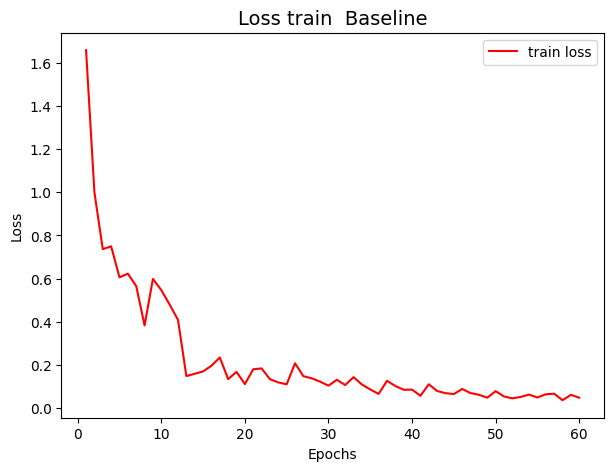

In [8]:
plt.figure(figsize=(7,5))

x_ax = np.arange(1, len(Loss_train)+1) # Epochs
plt.plot(x_ax, Loss_train, color='red', label='train loss')
#plt.plot(x_ax, loss_valid, color='orange', label='valid loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss train  Baseline', size=14)
plt.legend()
plt.savefig('loss_train_base')

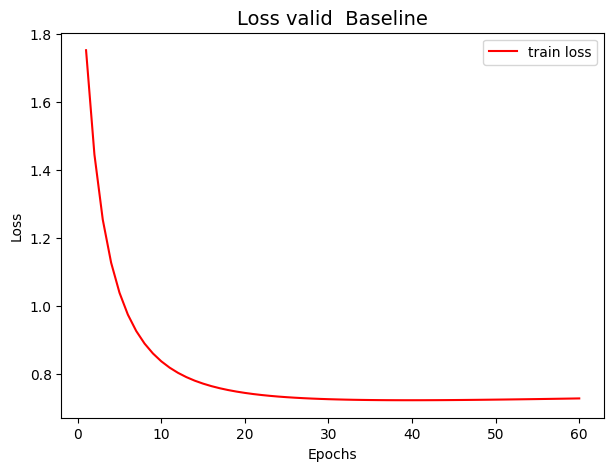

In [9]:
plt.figure(figsize=(7,5))

x_ax = np.arange(1, len(loss_valid)+1) # Epochs
plt.plot(x_ax, loss_valid, color='red', label='train loss')
#plt.plot(x_ax, loss_valid, color='orange', label='valid loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss valid  Baseline', size=14)
plt.legend()
plt.savefig('loss_valid_base')

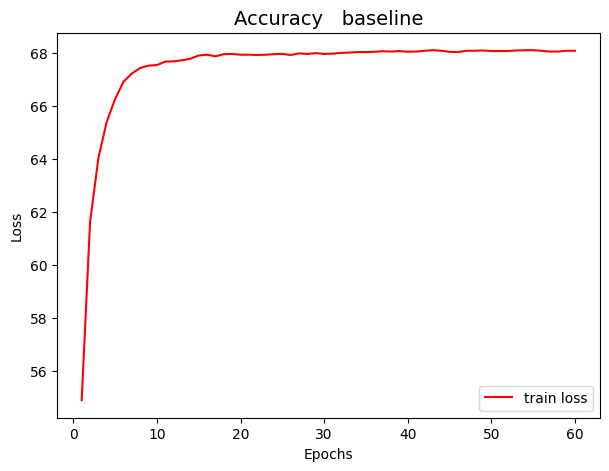

In [10]:
plt.figure(figsize=(7,5))

x_ax = np.arange(1, len(Acc)+1) # Epochs
plt.plot(x_ax, Acc, color='red', label='train loss')
#plt.plot(x_ax, loss_valid, color='orange', label='valid loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy   baseline', size=14)
plt.legend()
plt.savefig('acc_base')